Mean Red Packet Amount: 9.999999999999998
Median Red Packet Amount: 9.43
Variance of Red Packet Amounts: 41.75292890760001


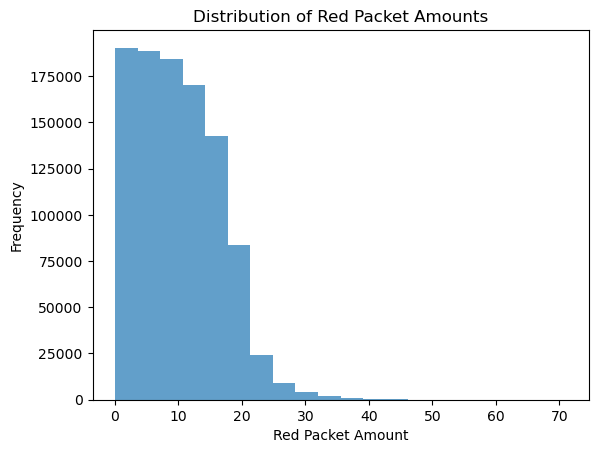

K-S Statistic: 0.060046000000000044, P-value: 0.0
The distribution of red packet amounts is not consistent with a uniform distribution.


In [2]:
import numpy as np
from scipy.stats import kstest
import random
def luck_money(total, num):
    tmp = num
    for i in range(num-1):       
        hb = round(random.uniform(0.01, total/num*2), 2)
        total = total - hb
        if total <= num*0.01:   
            total = total + hb
            num -= 1
            hb = total - num*0.01
            yield round(hb, 2)
            for j in range(i+1, tmp):   
                yield 0.01
            break                       
        yield hb
        num -= 1
    else:                       
        total = round(total, 2)
        yield total

def collect_red_packet_distribution_data(total_amount, num_packets, num_simulations):
    # 初始化一个列表来收集所有红包金额数据
    all_red_packets = []
    
    for _ in range(num_simulations):
        generator = luck_money(total_amount, num_packets)
        all_red_packets.extend([float(amount) for amount in generator])
    
    return all_red_packets


total_amount = 100 
num_packets = 10   
num_simulations = 100000 

red_packet_data = collect_red_packet_distribution_data(total_amount, num_packets, num_simulations)

mean_amount = np.mean(red_packet_data)
median_amount = np.median(red_packet_data)
variance_amount = np.var(red_packet_data)

print(f"Mean Red Packet Amount: {mean_amount}")
print(f"Median Red Packet Amount: {median_amount}")
print(f"Variance of Red Packet Amounts: {variance_amount}")

import matplotlib.pyplot as plt

plt.hist(red_packet_data, bins=20, alpha=0.7)
plt.title('Distribution of Red Packet Amounts')
plt.xlabel('Red Packet Amount')
plt.ylabel('Frequency')
plt.show()

# K-S

ks_statistic, p_value = kstest(red_packet_data, 'uniform', args=(0, total_amount/num_packets*2))
print(f"K-S Statistic: {ks_statistic}, P-value: {p_value}")

if p_value > 0.05:  
    print("The distribution of red packet amounts is consistent with a uniform distribution.")
else:
    print("The distribution of red packet amounts is not consistent with a uniform distribution.")